In [3]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

## Initiating Series

In [ ]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
# obj.values -> returns a numpy array
# obj.index

When you are only passing a dict, the index in the resulting Series will have the `dict`’s keys in sorted order. You can override this by passing the dict keys in the order you want them to appear in the resulting `Series`.

In [ ]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

A `Series`’s index can be altered in-place by assignment. Note that this is not index rearranging, but change the labeling in order.

In [ ]:
obj = pd.Series([4, 7, -5, 3])
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']

Note that `Index` objects are actually immutable, and thus the following will yield an error. Thus what is above is replacing the whole index of `obj` by another `Index`.

In [ ]:
# obj.index[1] = 'Alice'

Now, since we are on the topic of `Index`.

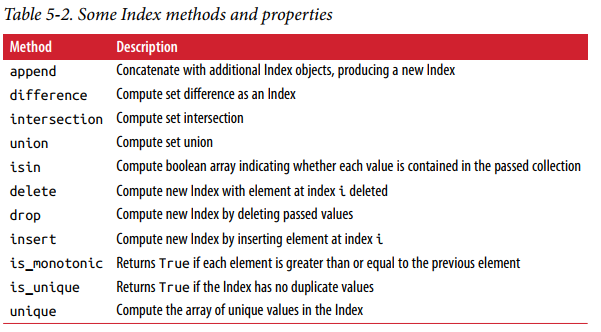

## Initiating DataFrame

### From a dictionary of lists

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six']) # debt will be initiatiated as NA.

It is sometimes easier to think about if the raw data is aligned along the rows, i.e. as a list of dictionaries, where the keys are the future columns of the `DataFrame`. By the way, list of `Series` also works the same here.

Assigning a column that doesn’t exist will create a new column. The `del` keyword will
delete columns as with a dict. Another way to drop a column/row with `DataFrame` is `drop`; see [Index](Index.ipynb).

## Reindex

Calling `reindex` on this `Series` rearranges the data according to the new index, introducing missing values if any index values were not already present.

In [ ]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

In [ ]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

For ordered data like time series, it may be desirable to do some interpolation or filling of values when reindexing. The method option allows us to do this, using a method such as `ffill`, which forward-fills the values.

In [ ]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3
obj3.reindex(range(6), method='ffill')

The columns can be reindexed with the `columns` keyword, though a more natural choice may be to use `loc`.

Note the difference between `reindex` and `reset_index`: the latter reset the index to the default one, removing one or more `MultiIndex`.

## Arithmetic and Data Alignment

An important pandas feature for some applications is the behavior of arithmetic between objects with different indexes. When you are adding together objects, if any index pairs are not the same, the respective index in the result will be the union of the index pairs. 

In [ ]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])

s1 + s2

In the case of DataFrame, alignment is performed on both the rows and the columns

In [ ]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1 - df2

In arithmetic operations between differently indexed objects, you might want to fill with a special value, like 0, when an axis label is found in one object but not the other.

In [ ]:
df1.add(df2, fill_value=0)

By default, arithmetic between `DataFrame` and `Series` matches the index of the `Series` on the `DataFrame`’s columns, broadcasting down the rows.

In [ ]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]
frame - series

If an index value is not found in either the `DataFrame`’s columns or the `Series`’s index,
the objects will be reindexed to form the union, and `np.nan` will fill the gap.

In [ ]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
frame + series2

If you want to instead broadcast over the columns, matching on the rows, you have to
use one of the arithmetic methods.

In [ ]:
series3 = frame['d']
frame.sub(series3, axis='index')

See more material in [Alignment](Alignment.ipynb).

## `Categorical` Data

There is a special data type in `pandas` called `Categorical`. It can yield significant performance and memory advantage especially when you are dealing with a large dataset. In particular, `groupby` operations will be markedly faster.  

In [4]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2
N = len(fruits)
df = pd.DataFrame({'fruit': fruits,
    'basket_id': np.arange(N),
    'count': np.random.randint(3, 15, size=N),
    'weight': np.random.uniform(0, 4, size=N)},
    columns=['basket_id', 'fruit', 'count', 'weight'])
df

,basket_id,fruit,count,weight
0,0,apple,7,2.956706
1,1,orange,10,2.622620
2,2,apple,11,1.608939
3,3,apple,5,3.672115
4,4,apple,10,3.196101
5,5,orange,3,1.708658
6,6,apple,9,1.192209
7,7,apple,11,1.998904


In [6]:
fruit_cat = df['fruit'].astype('category')
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

The `values` of a `Categorical` type are not `Numpy` arrays any more, but `pandas.Categorical`. Categorical object has `categories` and `codes` attributes. `categories` can consist of any immutable value types.

In [8]:
c = fruit_cat.values
c.categories

Index(['apple', 'orange'], dtype='object')

In [9]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

You can change the type into `Category` by using `astype`.

In [ ]:
df['fruit'] = df['fruit'].astype('category')

If you have obtained categorical encoded data from another source, you can use the alternative `from_codes` constructor.

In [ ]:
categories = ['foo', 'bar', 'baz']
codes = [0, 1, 2, 0, 0, 1]
my_cats_2 = pd.Categorical.from_codes(codes, categories)

Unless explicitly specified, categorical conversions assume no specific ordering of the categories. So the categories array may be in a different order depending on the ordering of the input data. When using from_codes or any of the other constructors, you can indicate that the categories have a meaningful ordering.

In [ ]:
ordered_cat = pd.Categorical.from_codes(codes, categories, ordered=True)

Here are some useful methods for `Categorical` data.

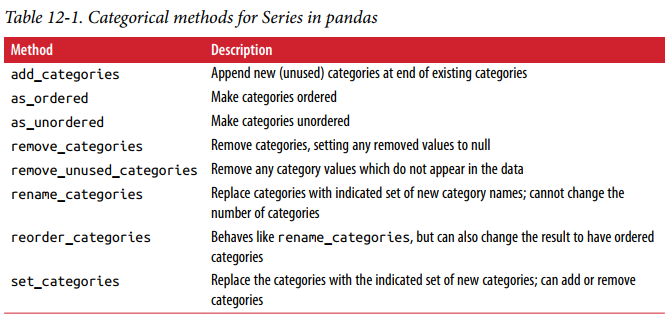

## References

- < Python for Data Analysis >, ed2, Chapter 5